In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import holoviews as hv
from holoviews import opts


In [15]:
# Загрузка данных
Labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(X_train, y_train), (X_test_class, y_test_class) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0  # Нормализация
X_test = X_test_class.reshape(-1, 28, 28, 1) / 255.0  # Нормализация

# Преобразование меток в категориальный формат
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test_class, num_classes=10)

In [16]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 1.0
0.0 1.0


In [17]:
#datagen = ImageDataGenerator(
#    rotation_range=20,  # Увеличьте угол поворота
#    width_shift_range=0.2,  # Увеличьте сдвиг по ширине
#    height_shift_range=0.2,  # Увеличьте сдвиг по высоте
#    horizontal_flip=True,
#    zoom_range=0.2,  # Добавьте зум
#    shear_range=0.2  # Добавьте сдвиг
#)
#
#datagen.fit(X_train)

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import layers, models
import holoviews as hv
from holoviews import opts
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU


In [19]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='elu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='elu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Удален последний слой MaxPooling2D
    model.add(Conv2D(512, (3, 3), activation='elu', padding='same'))
    model.add(BatchNormalization())
    # Вместо MaxPooling2D добавляем GlobalMaxPooling2D
    model.add(GlobalMaxPooling2D())

    model.add(Flatten())
    model.add(Dense(128, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model



In [20]:
model = create_model()
model.summary()
model.compile(optimizer="adam",
              loss="categorical_crossentropy",  # Используем категориальную кросс-энтропию
              metrics=["accuracy"])



C:\Users\v.smetana\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 1, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 1, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638,922 (6.25 MB)

 Trainable params: 1,636,938 (6.24 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [21]:
history = model.fit(X_train, y_train_categorical, batch_size=64,
                    validation_data=(X_test, y_test_categorical),
                    epochs=15)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.7927 - loss: 0.6694 - val_accuracy: 0.8564 - val_loss: 0.3868
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.8942 - loss: 0.2979 - val_accuracy: 0.8931 - val_loss: 0.2950
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9141 - loss: 0.2382 - val_accuracy: 0.9056 - val_loss: 0.2632
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9245 - loss: 0.2100 - val_accuracy: 0.9086 - val_loss: 0.2654
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9332 - loss: 0.1826 - val_accuracy: 0.9032 - val_loss: 0.2708
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9422 - loss: 0.1633 - val_accuracy: 0.9048 - val_loss: 0.2932
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9483 - loss: 0.1432 - val_accuracy: 0.9183 - val_loss: 0.2523
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.9536 - loss: 0.1280 - 

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Оценка модели на тренировочной выборке
train_score = model.evaluate(X_train, y_train_categorical)
print('Train score:', train_score)

# Оценка модели на тестовой выборке
test_score = model.evaluate(X_test, y_test_categorical)
print('Test score:', test_score)



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9710 - loss: 0.0980
Train score: [0.1010570377111435, 0.9697999954223633]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9110 - loss: 0.4448
Test score: [0.42954859137535095, 0.909600019454956]


In [34]:
# Получение вероятностей предсказаний для тестовой выборки
pred_probs = model.predict(X_test)

# Получение предсказанных классов
y_pred = np.argmax(pred_probs, axis=1)

# Генерация отчета о классификации
report = classification_report(y_test_categorical.argmax(axis=1), y_pred, target_names=[str(i) for i in range(10)])

# Вывод отчета
print(report)

# Вывод метрик для класса 8
conf_matrix = confusion_matrix(y_test_categorical.argmax(axis=1), y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Извлечение значений для класса 8
if 8 < conf_matrix.shape[0]:  # Проверяем, существует ли класс 8 в матрице
    tp = conf_matrix[8, 8]  # True Positives для класса 8
    fn = conf_matrix.sum(axis=1)[8] - tp  # False Negatives для класса 8
    fp = conf_matrix.sum(axis=0)[8] - tp  # False Positives для класса 8
    total_class_8 = conf_matrix.sum(axis=1)[8]  # Общее количество примеров класса 8

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = tp / total_class_8 if total_class_8 > 0 else 0  # Accuracy для класса 8

    print(f"Metrics for class 8: Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}, Accuracy: {accuracy:.4f}")
else:
    print("Class 8 not found in the test set.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       1.00      0.99      0.99      1000
           2       0.91      0.78      0.84      1000
           3       0.96      0.88      0.92      1000
           4       0.75      0.94      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.79      0.77      1000
           7       0.94      0.99      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

Confusion Matrix:
 [[839   0  12   9  10   1 124   0   5   0]
 [  1 986   3   4   1   0   3   0   2   0]
 [ 16   1 776   4 160   0  42   0   1   0]
 [ 11   2  11 878  40   0  56   0   1   1]
 [  2   0

In [23]:
target_class = 8 # класс 'Bag'
errors = np.where((y_test_class == target_class) & (y_pred != target_class))[0]
misclassified_classes = y_pred[errors] # Классы, к которым были ошибочно отнесены
misclassified_counts = np.bincount(misclassified_classes, minlength=10) # Считаем количество ошибок по классам
for i, count in enumerate(misclassified_counts):
    if count > 0:
        print(f'Класс {Labels[i]} ошибочно классифицирован {count} раз(а).')

Класс T-shirt/top ошибочно классифицирован 1 раз(а).
Класс Pullover ошибочно классифицирован 1 раз(а).
Класс Dress ошибочно классифицирован 2 раз(а).
Класс Coat ошибочно классифицирован 8 раз(а).
Класс Sandal ошибочно классифицирован 3 раз(а).
Класс Shirt ошибочно классифицирован 4 раз(а).
Класс Sneaker ошибочно классифицирован 9 раз(а).
Класс Ankle boot ошибочно классифицирован 3 раз(а).


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
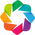

In [24]:
hv.extension('bokeh')

In [25]:
# Функция для отображения изображений с ошибками
def draw_image_test(i):
    return hv.Image(X_test[i]).opts(title="Predicted: %s | Actual: %s" % (Labels[y_pred[i]], Labels[y_test_class[i]]),
                                      xaxis='bare', yaxis='bare',
                                      cmap='grey', height=300, width=300,
                                      cnorm='linear')

# Отображение изображений с ошибками
img = {i: draw_image_test(i) for i in errors}
NdLayout = hv.NdLayout(img).opts(title="Images predicted class", height=2250, width=1200).cols(4)
NdLayout

:NdLayout   [Default]
   :Image   [x,y]   (z)

In [26]:
# Сохранение модели
model.save('fashion_mnist_model_30.keras')